In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
den = pd.read_csv('datasets\\dengue.csv')

In [3]:
den

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>1. How many Dengue cases are reported each month?</h1>

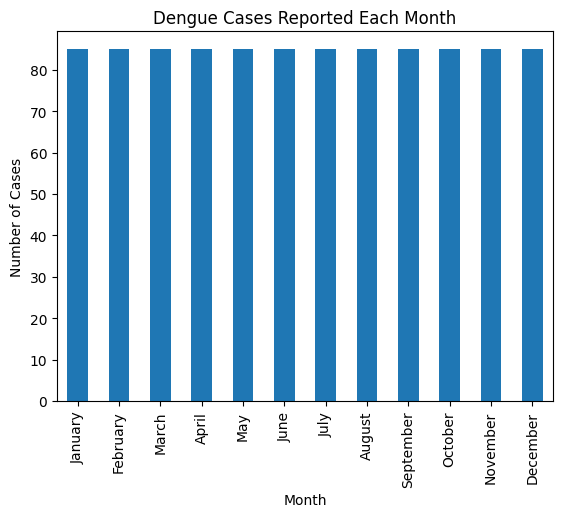

In [60]:
Months = {
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
}

plt.figure()
den['Month'].value_counts().plot(kind='bar')
plt.title('Dengue Cases Reported Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()


<h1>Which year had the most Dengue cases?</h1>

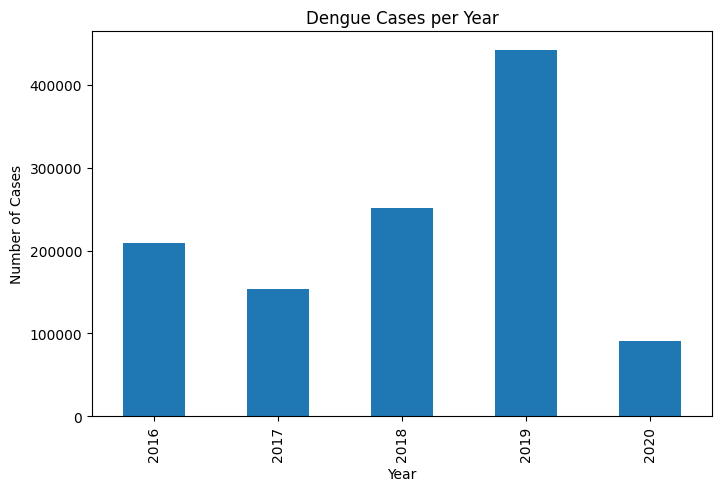

In [57]:
plt.figure(figsize=(8, 5))
den.groupby('Year')['Dengue_Cases'].sum().plot(kind='bar')
plt.title('Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


<h1>3. Is there a difference in Dengue cases across regions?</h1>

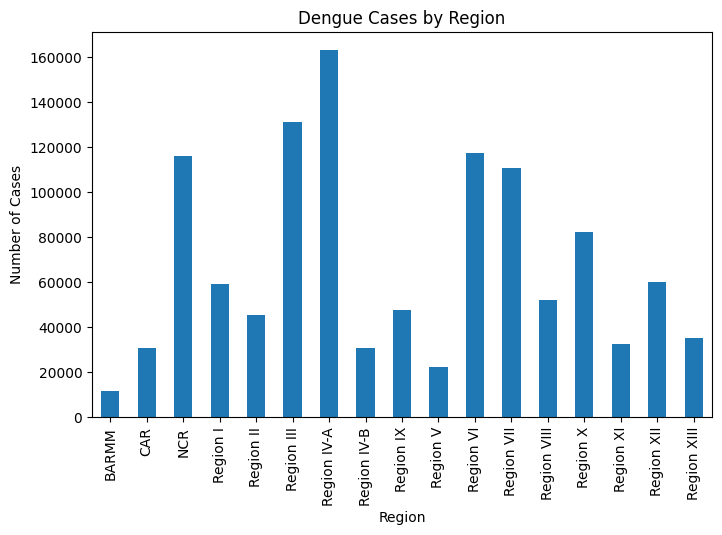

In [59]:
plt.figure(figsize=(8, 5))
den.groupby('Region')['Dengue_Cases'].sum().plot(kind='bar')
plt.title('Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.show()


<h1>Which month has the most Dengue deaths?</h1>

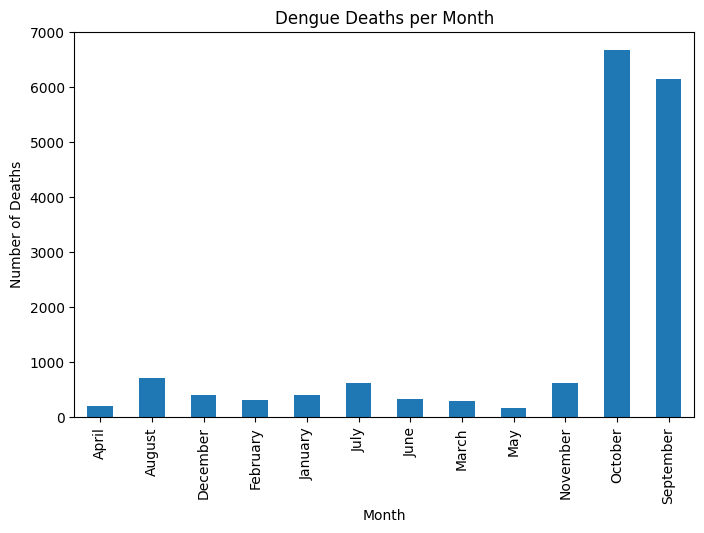

In [40]:
plt.figure(figsize=(8, 5))
den.groupby('Month')['Dengue_Deaths'].sum().plot(kind='bar')
plt.title('Dengue Deaths per Month')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.show()


<h1>5. Do Dengue cases increase or decrease over the years?</h1>

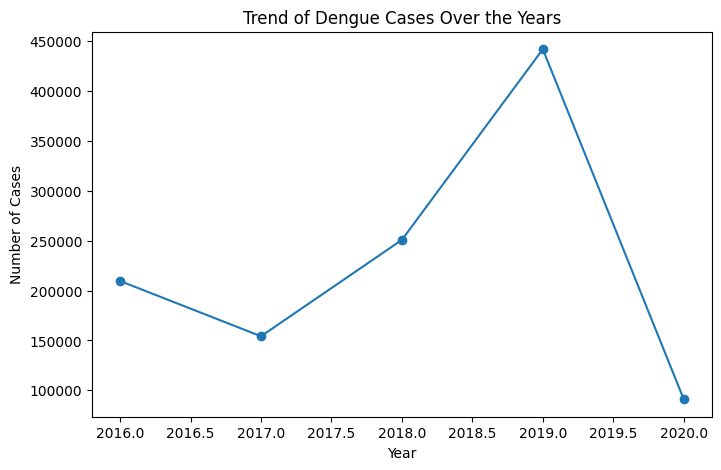

In [39]:
plt.figure(figsize=(8, 5))
den.groupby('Year')['Dengue_Cases'].sum().plot(kind='line', marker='o')
plt.title('Trend of Dengue Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


<h1>6. Are there any months with unusually high Dengue cases?</h1>

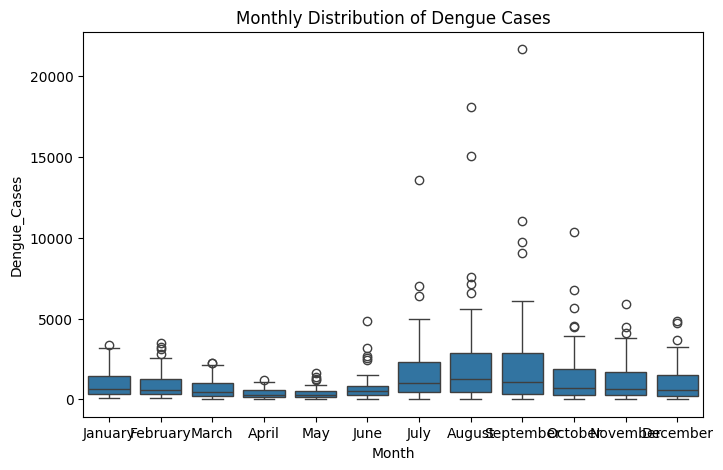

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Month', y='Dengue_Cases', data=den)
plt.title('Monthly Distribution of Dengue Cases')
plt.show()


<h1>7. Do certain regions have more Dengue deaths than others?</h1>

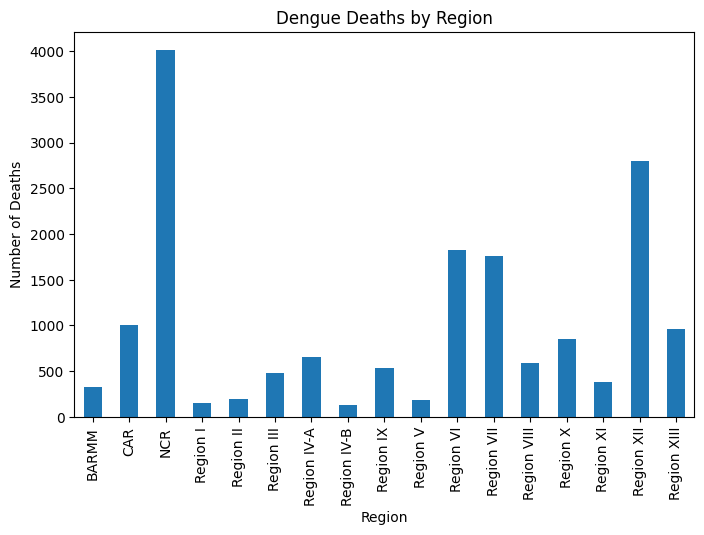

In [38]:
plt.figure(figsize=(8, 5))
den.groupby('Region')['Dengue_Deaths'].sum().plot(kind='bar')
plt.title('Dengue Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')
plt.show()


<h1>8. Which region has the highest average number of Dengue cases per month?</h1>

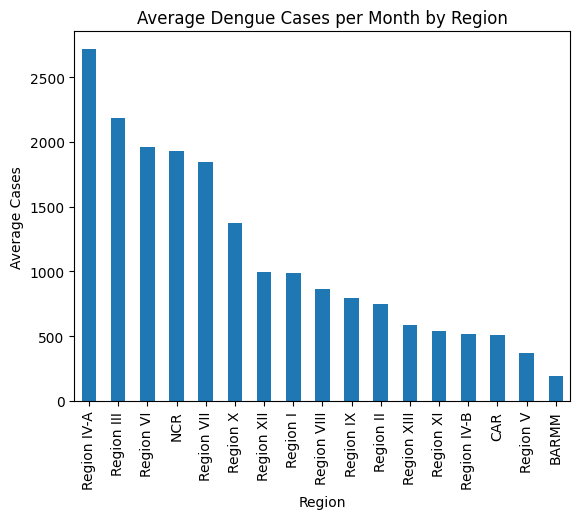

In [56]:
avg_cases_per_region = den.groupby('Region')['Dengue_Cases'].mean().sort_values(ascending=False)

highest_avg_region = avg_cases_per_region.idxmax()

avg_cases_per_region.plot(kind='bar')
plt.title('Average Dengue Cases per Month by Region')
plt.xlabel('Region')
plt.ylabel('Average Cases')
plt.show()


<h1>9. What’s the average number of Dengue cases per month?</h1>

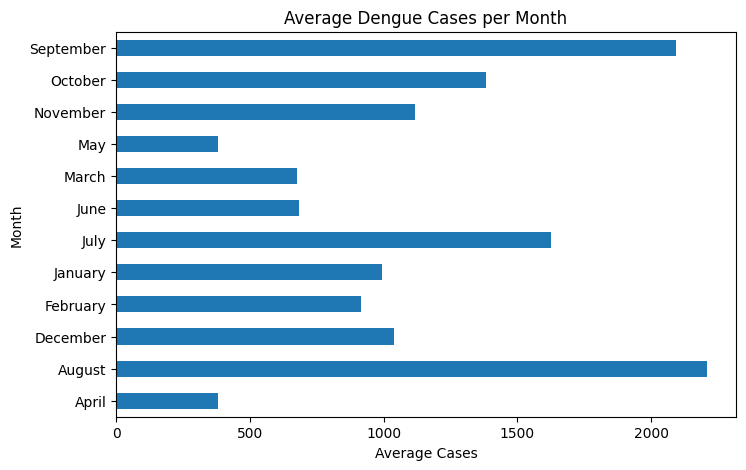

In [41]:
plt.figure(figsize=(8, 5))
den.groupby('Month')['Dengue_Cases'].mean().plot(kind='barh')
plt.title('Average Dengue Cases per Month')
plt.xlabel('Average Cases')
plt.ylabel('Month')
plt.show()


<h1>10. Do Dengue deaths follow the same pattern as cases?</h1>

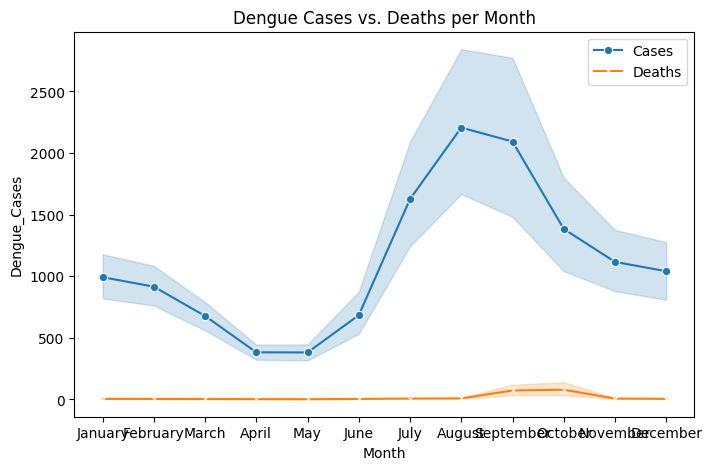

In [36]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=den, x='Month', y='Dengue_Cases', label='Cases', marker='o')
sns.lineplot(data=den, x='Month', y='Dengue_Deaths', label='Deaths', marker='x')
plt.title('Dengue Cases vs. Deaths per Month')
plt.show()


<h1>11. Which region has the least Dengue cases?</h1>

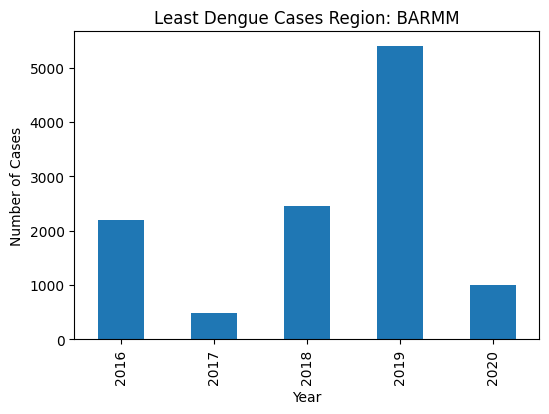

In [43]:
least_cases_region = den.groupby('Region')['Dengue_Cases'].sum().idxmin()

plt.figure(figsize=(6, 4))
den[den['Region'] == least_cases_region].groupby('Year')['Dengue_Cases'].sum().plot(kind='bar')
plt.title(f'Least Dengue Cases Region: {least_cases_region}')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


<h1>12. Which year had the highest number of Dengue deaths?</h1>

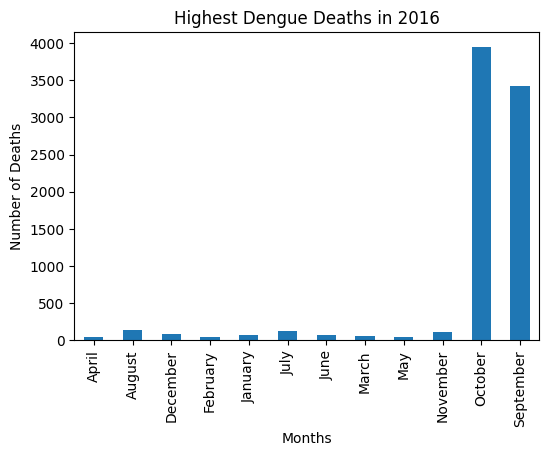

In [83]:
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Determine the year with the highest dengue deaths
highest_deaths_year = den.groupby('Year')['Dengue_Deaths'].sum().idxmax()

plt.figure(figsize=(6, 4))
den[den['Year'] == highest_deaths_year].groupby('Month')['Dengue_Deaths'].sum().reindex(custom_order).plot(kind='bar')
plt.title(f'Highest Dengue Deaths in {highest_deaths_year}')
plt.xlabel('Months')
plt.ylabel('Number of Deaths')
plt.show()

<h1>13. Is there a month when deaths are unusually high?</h1>

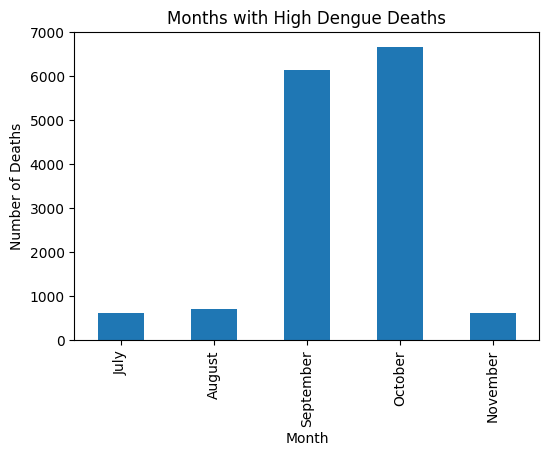

In [79]:
high_death_months = den.groupby('Month')['Dengue_Deaths'].sum().sort_values(ascending=False).head()

custom_order = [ 'July', 'August', 'September', 'October', 'November']

high_death_months = den.groupby('Month')['Dengue_Deaths'].sum()

high_death_months = monthly_deaths.reindex(custom_order)

plt.figure(figsize=(6, 4))
high_death_months.plot(kind='bar')
plt.title('Months with High Dengue Deaths')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.show()


<h1>14. What is the correlation between Dengue cases and deaths?</h1>

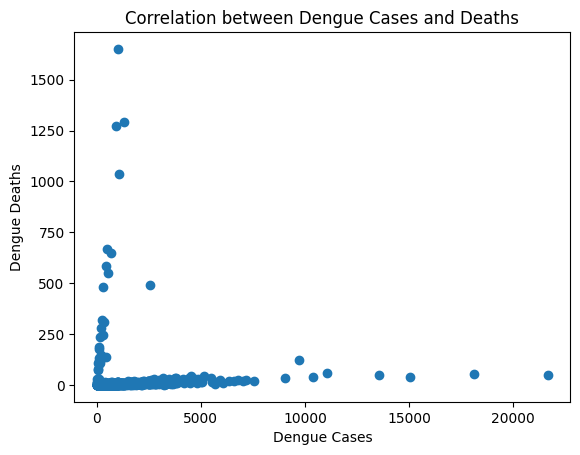

In [54]:
correlation = den['Dengue_Cases'].corr(den['Dengue_Deaths'])

plt.scatter(den['Dengue_Cases'], den['Dengue_Deaths'])
plt.title('Correlation between Dengue Cases and Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()


<h1>15. Do regions with more cases always have more deaths?</h1>

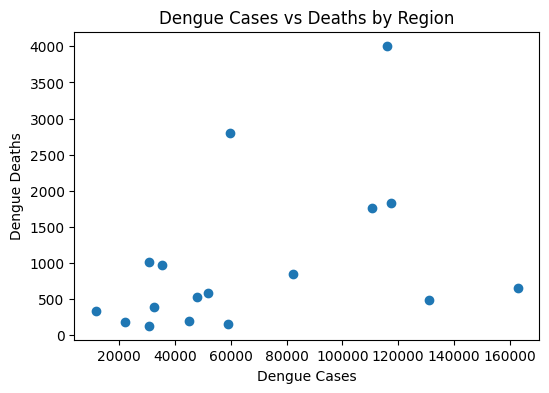

In [47]:
region_stats = den.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()

plt.figure(figsize=(6, 4))
plt.scatter(region_stats['Dengue_Cases'], region_stats['Dengue_Deaths'])
plt.title('Dengue Cases vs Deaths by Region')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()


<h1>16. Is the number of cases increasing or decreasing in each region?</h1>

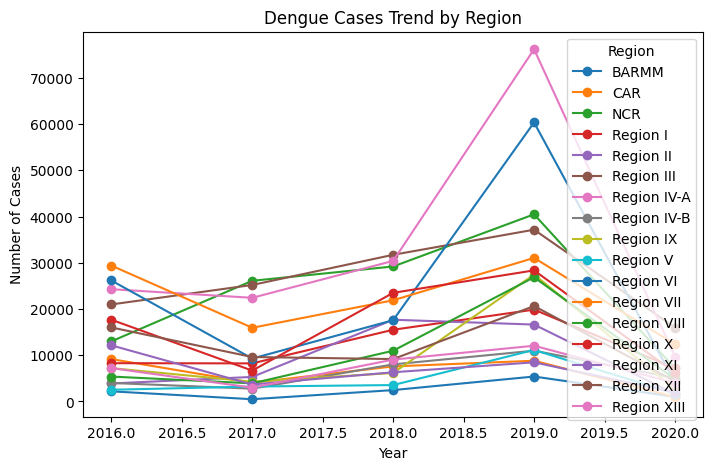

In [48]:
region_trends = den.groupby(['Region', 'Year'])['Dengue_Cases'].sum().unstack()

region_trends.T.plot(marker='o', figsize=(8, 5))
plt.title('Dengue Cases Trend by Region')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


<h1>17. Do any regions consistently have high death rates?</h1>

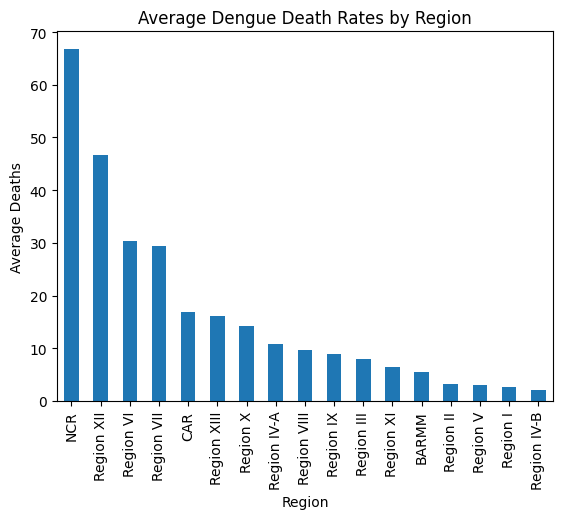

In [49]:
region_deaths = den.groupby('Region')['Dengue_Deaths'].mean().sort_values(ascending=False)

region_deaths.plot(kind='bar')
plt.title('Average Dengue Death Rates by Region')
plt.xlabel('Region')
plt.ylabel('Average Deaths')
plt.show()


<h1>18. Are deaths linked to certain months regardless of the region?</h1>

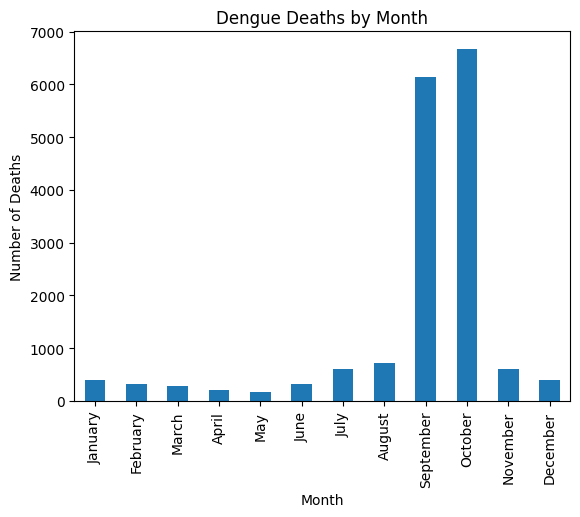

In [76]:
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_deaths = den.groupby('Month')['Dengue_Deaths'].sum()

monthly_deaths = monthly_deaths.reindex(custom_order)

monthly_deaths.plot(kind='bar')
plt.title('Dengue Deaths by Month')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.show()


<h1>19. What percentage of total Dengue cases occurred in the top 3 regions?</h1>

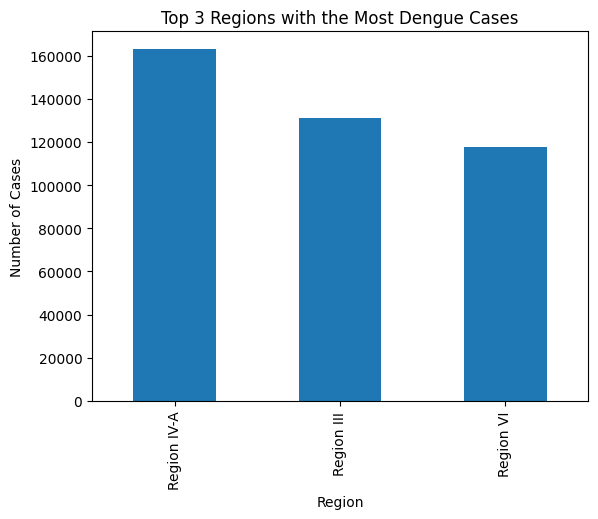

In [55]:
total_cases = den['Dengue_Cases'].sum()
top_3_regions = den.groupby('Region')['Dengue_Cases'].sum().nlargest(3)

percentage_top_3 = (top_3_regions.sum() / total_cases) * 100

top_3_regions.plot(kind='bar')
plt.title('Top 3 Regions with the Most Dengue Cases')
plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.show()


<h1>20. How do deaths compare between the highest and lowest case regions?</h1>

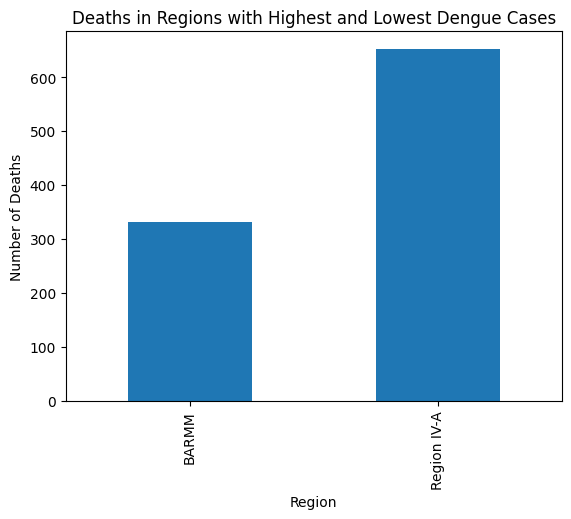

In [52]:
highest_region = den.groupby('Region')['Dengue_Cases'].sum().idxmax()
lowest_region = den.groupby('Region')['Dengue_Cases'].sum().idxmin()

deaths_comparison = den[den['Region'].isin([highest_region, lowest_region])].groupby('Region')['Dengue_Deaths'].sum()

deaths_comparison.plot(kind='bar')
plt.title('Deaths in Regions with Highest and Lowest Dengue Cases')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')
plt.show()
